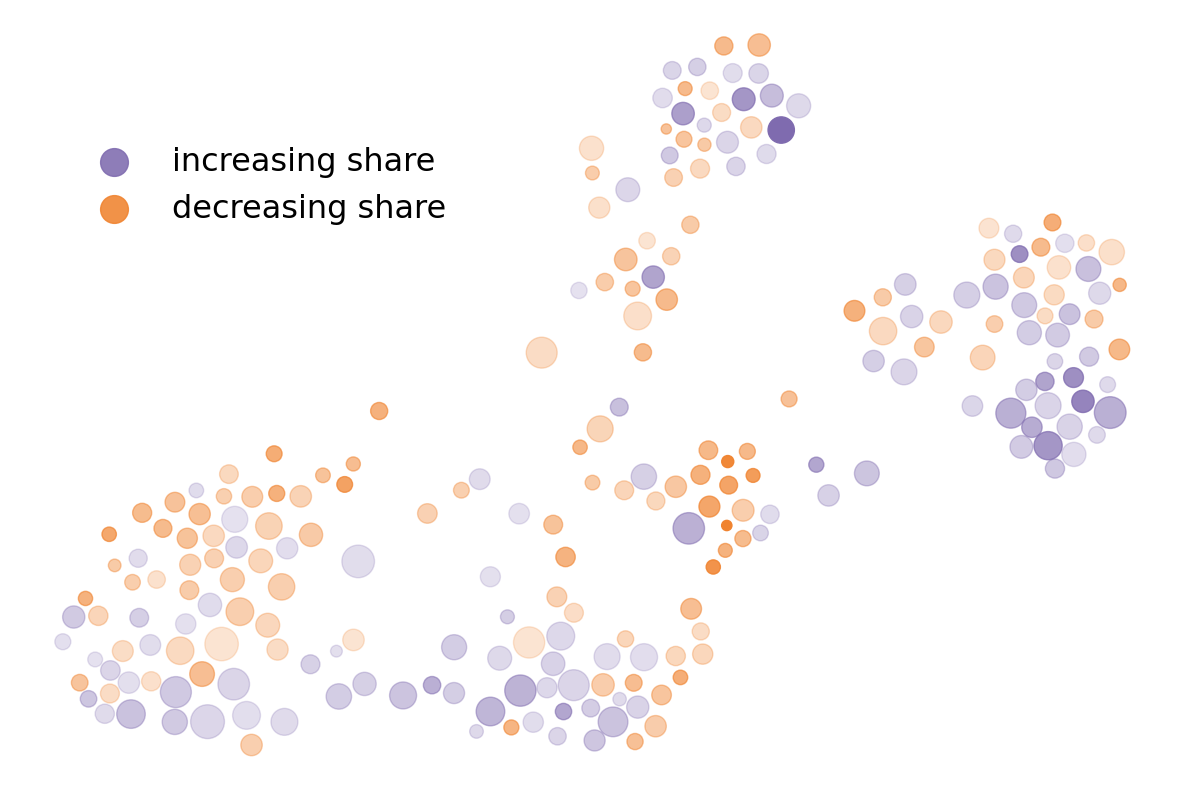

In [1]:
from pickle_file import load_obj
from collections import defaultdict
import numpy as np

data_path = 'data_processing/data_files/task_space_data/'
data_path_save = data_path + 'obj_tag_question_bipartite_core_space/'


df_task_space = load_obj('umapdf_DBSCAN2_level1_user_count', data_path_save + 'task_space_draw/')
df_cluster_adjusted = load_obj('cluster_conclusion_adjusted', data_path_save + 'task_space_draw/')

color_yyahn = ['#e33831', '#f7ad30', '#8dc53e', '#cab6d9', '#08b07f', '#f2a794', '#ed643a', '#871918', '#a1d9e8', '#b985ba', '#d5c726', '#508dc4', '#2b2064', '#7d7d7d', '#7852A9', '#1db58f', '#faccbd', '#dc2227', '#609f5c', '#cd6c74', '#f293d1', '#f4a720', '#a08f27']

df_task_space['yyahn_c'] = [color_yyahn[22-t] for t in df_task_space.cluster_inc_all]
df_cluster_adjusted['yyahn_c'] = [color_yyahn[22-t] for t in df_cluster_adjusted.cluster]


level = 1

programming_language_std_adjusted = load_obj('programming_language_std_adjusted', data_path_save)
L_dict = {l:i for i,l in enumerate(programming_language_std_adjusted)}
community_list_core_std = load_obj(f"community_list_std_core_cut_level{level}", data_path_save + 'networks/probability/')
C_dict = {c:i for i,c in enumerate(community_list_core_std)}
community_core_level = load_obj(f"community_core_with_cut_level{level}", data_path_save + 'networks/probability/')

tag_community_dict = {}
for i,c in community_core_level.items():
    for t in c:
        tag_community_dict[t] = i

import matplotlib.pyplot as plt

yr1 = 2009
task_user_set1 = defaultdict(set)
task_user_set = load_obj(f'task_user_set_{yr1}_level_{level}', data_path_save + 'vote_regression_together/user_c_l_list/')
for u, tsl in task_user_set.items():
    for t in tsl:
        task_user_set1[t].add(u)

task_user_all1 = sum([len(ul) for ul in task_user_set1.values()])
task_user_share1 = {t:len(ul)/task_user_all1 for t, ul in task_user_set1.items()}


yr2 = 2022
task_user_set2 = defaultdict(set)
task_user_set = load_obj(f'task_user_set_{yr2}_level_{level}', data_path_save + 'vote_regression_together/user_c_l_list/')
for u, tsl in task_user_set.items():
    for t in tsl:
        task_user_set2[t].add(u)

task_user_all2 = sum([len(ul) for ul in task_user_set2.values()])
task_user_share2 = {t:len(ul)/task_user_all2 for t, ul in task_user_set2.items()}

task_share_change = {t:np.log(task_user_share2[t]) - np.log(task_user_share1[t]) for t in task_user_share1.keys()}

task_share_min = min([s for s in task_share_change.values()])
task_share_max = max([s for s in task_share_change.values()])


task_user_set_all = defaultdict(set)

task_user_set = load_obj(f'task_user_set_{yr2}_level_{level}', data_path_save + 'vote_regression_together/user_c_l_list/')
for u, tsl in task_user_set.items():
    for t in tsl:
        task_user_set_all[t].add(u)

task_user_count = {t:len(ul) for t, ul in task_user_set_all.items()}
task_size_list = [np.sqrt(task_user_count[t[10:]]) * 4 for t in df_task_space.occ_code]



fig = plt.figure(figsize=(15,10))


growth_color = {}

for t,sc in task_share_change.items():
    if sc > 0:
        growth_color[t] = '#7f6baf'

    if sc < 0:
        growth_color[t] = '#f0832f'

    if sc == 0:
        growth_color[t] = 'white'

growth_alpha = {}
for t,sc in task_share_change.items():
    if sc < 0:
        growth_alpha[t] = sc/task_share_min

    if sc > 0:
        growth_alpha[t] = sc/task_share_max

    if sc == 0:
        growth_alpha[t] = 0

original_list = [growth_alpha[t[10:]] for t in df_task_space.occ_code]
tuned_min = 0.2
tuned_max = 1

a_linear = (tuned_max - tuned_min) /(max(original_list) - min(original_list))
b_linear = tuned_max - a_linear * max(original_list)
alpha_adjust_list = [a_linear * s + b_linear for s in original_list]

plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s = task_size_list, c = [growth_color[t[10:]] for t in df_task_space.occ_code], alpha = alpha_adjust_list)

ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(0);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(0);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(0);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(0);####设置上部坐标轴的粗细

plt.xticks([],[])
plt.yticks([],[])


legend_sizes = [400,400]
legend_colors = ['#7f6baf', '#f0832f']
handles = [plt.scatter([], [], s=size, c=color, alpha=0.88) for size,color in zip(legend_sizes, legend_colors)]
plt.legend(handles, ['increasing share', 'decreasing share'], prop={'weight' : 'normal','size': 23,}, frameon = False, bbox_to_anchor=(0.4, 0.86))

#plt.savefig('output/figure_3a_task_share_change.svg', format = 'svg', transparent = True)

#plt.text(0,4.3,f'{yr1}~{yr2}', fontdict={'family':'helvetica','weight' : 'bold','size'   : 40,})

plt.show()



(240, 131, 47)


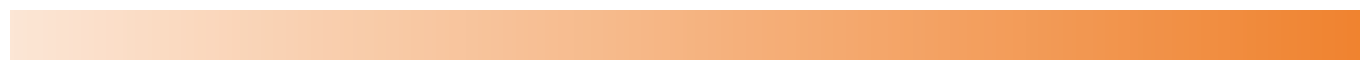

In [2]:
def hex_to_rgb(hex_color):
    # 去掉可能存在的 '#' 字符
    hex_color = hex_color.lstrip('#')
    
    # 将十六进制颜色代码转换为 RGB 元组
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

# 示例使用
hex_color = color_yyahn[12]
rgb_color = hex_to_rgb('f0832f')
a1,a2,a3 = rgb_color
print(rgb_color)

from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl


#从白色到红色再到黑色
bounds = [0, 0.5, 1]
colors = [(a1/255, a2/255, a3/255,0.2), (a1/255, a2/255, a3/255,0.6), (a1/255, a2/255, a3/255,1)]

cmap = LinearSegmentedColormap.from_list('mymap', list(zip(bounds, colors)), N = 323)
#sns.heatmap(data, cmap = cmap)

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0.05, 0.8, 0.9, 0.05])
cmap = cmap
C = [1, 237]

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=cmap,
                               norm=mpl.colors.Normalize(0, max(C)),  # vmax and vmin
                               #extend='both',
                               
                               )
ax.set_xticks([])
cb.outline.set_visible(False)

#plt.savefig('output/figure_3a_colorbar1.svg', format = 'svg', bbox_inches='tight', transparent = True)
plt.show()

(127, 107, 175)


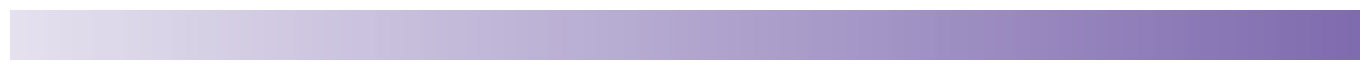

In [3]:
def hex_to_rgb(hex_color):
    # 去掉可能存在的 '#' 字符
    hex_color = hex_color.lstrip('#')
    
    # 将十六进制颜色代码转换为 RGB 元组
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

# 示例使用
hex_color = color_yyahn[12]
rgb_color = hex_to_rgb('7f6baf')
a1,a2,a3 = rgb_color
print(rgb_color) 


from matplotlib.colors import LinearSegmentedColormap

#从白色到红色再到黑色
bounds = [0, 0.5, 1]
#colors = [(8/255, 176/255, 127/255,0.2), (8/255, 176/255, 127/255,0.6), (8/255, 176/255, 127/255,1)]
colors = [(a1/255, a2/255, a3/255,0.2), (a1/255, a2/255, a3/255,0.6), (a1/255, a2/255, a3/255,1)]
cmap = LinearSegmentedColormap.from_list('mymap', list(zip(bounds, colors)), N = 323)
#sns.heatmap(data, cmap = cmap)

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0.05, 0.8, 0.9, 0.05])
cmap = cmap
C = [1, 237]

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=cmap,
                               norm=mpl.colors.Normalize(0, max(C)),  # vmax and vmin
                               #extend='both',
                               
                               )
ax.set_xticks([])
cb.outline.set_visible(False)
#plt.savefig('output/figure_3a_colorbar2.svg', format = 'svg', bbox_inches='tight', transparent = True)
plt.show()